In [162]:
import numpy as np
import matplotlib.pyplot as plt

def E(x):
    if 1 >= x >= 0:
        return 1
    else:
        return 0

def analytical_HK(mu, t, U):
    if E((mu - U) / (2 * t)) == 1 and E(mu / (2 * t)) == 1:
        return 2 - (np.arccos((mu - U) / (2 * t)) + np.arccos(mu / (2 * t))) / np.pi
    elif E((mu - U) / (2 * t)) == 0 and E(mu / (2 * t)) == 1:
        return 2 - np.arccos(mu / (2 * t)) / np.pi
    elif E((mu - U) / (2 * t)) == 1 and E(mu / (2 * t)) == 0:
        return 2 - np.arccos((mu - U) / (2 * t)) / np.pi
    elif E((mu - U) / (2 * t)) == 0 and E(mu / (2 * t)) == 0:
        return 2
    
def F(x):
    if 1 >= x >= -1:
        return 1
    else:
        return 0
    
def analytical_me(mu, t, U):
    if F(mu / (2 * t)) == 1 and F((mu - U) / (2 *t)) == 1:
        return (np.heaviside(mu - 2 * t, 0) + np.heaviside(mu - U - 2 * t, 0) + (1 / np.pi) * 
                (np.arccos(- mu / (2 * t)) + np.arccos(- (mu - U) / (2 * t))))
    elif F(mu / (2 * t)) == 1 and F((mu - U) / (2 *t)) == 0:
        return (np.heaviside(mu - 2 * t, 0) + np.heaviside(mu - U - 2 * t, 0) + (1 / np.pi) * 
                np.arccos(- mu / (2 * t)))
    elif F(mu / (2 * t)) == 0 and F((mu - U) / (2 *t)) == 1:
        return (np.heaviside(mu - 2 * t, 0) + np.heaviside(mu - U - 2 * t, 0) + (1 / np.pi) * 
                np.arccos(- (mu - U) / (2 * t)))
    elif F(mu / (2 * t)) == 0 and F((mu - U) / (2 *t)) == 0:
        return np.heaviside(mu - 2 * t, 0) + np.heaviside(mu - U - 2 * t, 0)
 
    
def analytical_me_2(mu, t, U):
    if F(mu / (2 * t)) == 1 and F((mu - U) / (2 *t)) == 1:
        return (1 + np.heaviside(mu - U + 2 * t, 1) - (1 / np.pi) * 
                (np.arccos(mu / (2 * t)) + np.arccos((mu - U) / (2 * t))))
    elif F(mu / (2 * t)) == 1 and F((mu - U) / (2 *t)) == 0:
        return (1 + np.heaviside(mu - U + 2 * t, 1) - (1 / np.pi) * 
                np.arccos(mu / (2 * t)))
    elif F(mu / (2 * t)) == 0 and F((mu - U) / (2 *t)) == 1:
        return (1 + np.heaviside(mu - U + 2 * t, 1) - (1 / np.pi) * 
                np.arccos((mu - U) / (2 * t)))
    elif F(mu / (2 * t)) == 0 and F((mu - U) / (2 *t)) == 0:
        return 1 + np.heaviside(mu - U + 2 * t, 1)

In [163]:
mu_array = np.linspace(-2, 10, 1000)
t = 1
U = 8

ana_HK = np.zeros(1000)
ana_me = np.zeros(1000)

for i in range(1000):
    ana_HK[i] = analytical_HK(mu_array[i], t, U)
    ana_me[i] = analytical_me_2(mu_array[i], t, U)
    
print(ana_me)


[0.         0.03490403 0.04938655 0.06051637 0.06991354 0.07820524
 0.08571297 0.09262761 0.09907349 0.10513691 0.11088071 0.11635227
 0.12158841 0.12661838 0.13146591 0.13615053 0.14068856 0.1450938
 0.14937804 0.15355146 0.15762291 0.16160012 0.16548995 0.16929845
 0.17303103 0.17669254 0.18028737 0.18381944 0.18729237 0.19070941
 0.19407355 0.19738754 0.2006539  0.20387496 0.20705286 0.2101896
 0.21328704 0.2163469  0.21937078 0.22236019 0.22531654 0.22824114
 0.23113525 0.23400001 0.23683655 0.23964588 0.242429   0.24518683
 0.24792024 0.25063008 0.25331713 0.25598215 0.25862585 0.26124891
 0.26385199 0.2664357  0.26900063 0.27154735 0.27407641 0.27658833
 0.27908359 0.28156268 0.28402606 0.28647416 0.28890741 0.29132622
 0.29373097 0.29612205 0.29849981 0.30086461 0.30321679 0.30555667
 0.30788456 0.31020078 0.31250562 0.31479936 0.31708227 0.31935464
 0.32161671 0.32386873 0.32611096 0.32834362 0.33056695 0.33278118
 0.3349865  0.33718315 0.33937132 0.34155122 0.34372303 0.345886

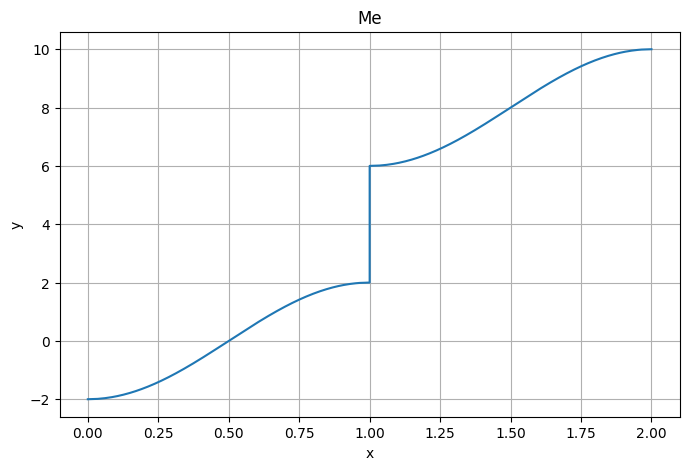

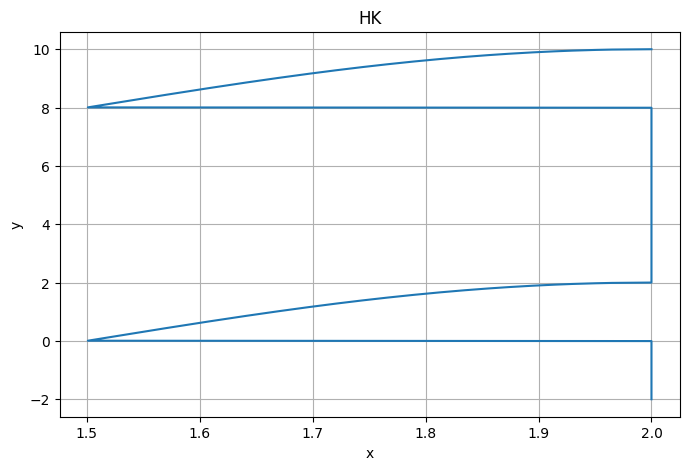

In [164]:
def plot_arrays(x_1, x_2, y_1, y_2):
    """
    Plots two arrays on a 2D plot.
    
    Parameters:
    x (list or array-like): Values for the x-axis
    y (list or array-like): Values for the y-axis
    """
    plt.figure(figsize=(8, 5))
    plt.plot(x_1, y_1, linestyle='-', label='HK')
    plt.plot(x_2, y_2, linestyle='-', label='Me')
    plt.ylabel(r"$\mu$")
    plt.xlabel(r"$\rho$")
    plt.title("Comparing solutions")
    plt.legend()
    plt.grid(True)
    plt.show()
    
def plot_one(x, y, title):
    plt.figure(figsize=(8, 5))
    plt.plot(x, y, linestyle='-')
    plt.ylabel('y')
    plt.xlabel('x')
    plt.title(title)
    plt.grid(True)
    plt.show()
    
#plot_arrays(ana_HK, ana_me, mu_array, mu_array)
plot_one(ana_me, mu_array, 'Me')
plot_one(ana_HK, mu_array, 'HK')

In [165]:
def kappa_HK(mu, t, U):
    if E((mu - U) / (2 * t)) == 1 and E(mu / (2 * t)) == 1:
        return (1 / (np.sqrt(4 * (t ** 2) - (mu - U)**2)) + 1 / (np.sqrt(4 * (t ** 2) - mu**2))) * (1 / np.pi)
    elif E((mu - U) / (2 * t)) == 0 and E(mu / (2 * t)) == 1:
        return 1 / (np.sqrt(4 * (t ** 2) - mu**2)) * (1 / np.pi)
    elif E((mu - U) / (2 * t)) == 1 and E(mu / (2 * t)) == 0:
        return (1 / (np.sqrt(4 * (t ** 2) - (mu - U)**2))) * (1 / np.pi)
    elif E((mu - U) / (2 * t)) == 0 and E(mu / (2 * t)) == 0:
        return 0
    
def kappa_me(mu, t, U):
    if F((mu - U) / (2 * t)) == 1 and F(mu / (2 * t)) == 1:
        return (1 / (np.sqrt(4 * (t ** 2) - (mu - U)**2)) + 1 / (np.sqrt(4 * (t ** 2) - mu**2))) * (1 / np.pi)
    elif F((mu - U) / (2 * t)) == 0 and F(mu / (2 * t)) == 1:
        return 1 / (np.sqrt(4 * (t ** 2) - mu**2)) * (1 / np.pi)
    elif F((mu - U) / (2 * t)) == 1 and F(mu / (2 * t)) == 0:
        return (1 / (np.sqrt(4 * (t ** 2) - (mu - U)**2))) * (1 / np.pi)
    elif F((mu - U) / (2 * t)) == 0 and F(mu / (2 * t)) == 0:
        return 0

In [166]:
kap_HK = np.zeros(1000)
kap_me = np.zeros(1000)

for i in range(1000):
    kap_HK[i] = kappa_HK(mu_array[i], t, U)
    kap_me[i] = kappa_me(mu_array[i], t, U)
    
print(kap_me)

[       inf 1.45433792 1.02992447 0.84220298 0.7304768  0.65435352
 0.59825298 0.55472348 0.51969399 0.49072774 0.46626531 0.44525632
 0.42696397 0.41085417 0.39652905 0.38368532 0.37208721 0.36154834
 0.3519191  0.3430779  0.33492472 0.32737644 0.32036336 0.31382649
 0.3077156  0.30198753 0.29660503 0.29153572 0.28675133 0.28222701
 0.27794088 0.27387352 0.27000769 0.26632797 0.26282055 0.25947303
 0.2562742  0.25321396 0.25028312 0.24747333 0.24477698 0.2421871
 0.23969735 0.23730186 0.23499526 0.23277261 0.23062931 0.22856116
 0.22656422 0.22463486 0.22276972 0.22096563 0.21921968 0.21752913
 0.21589142 0.21430417 0.21276514 0.21127222 0.20982345 0.20841697
 0.20705104 0.20572402 0.20443435 0.20318059 0.20196134 0.2007753
 0.19962125 0.19849801 0.19740447 0.19633958 0.19530235 0.19429183
 0.19330713 0.19234738 0.19141176 0.19049952 0.1896099  0.1887422
 0.18789576 0.18706992 0.18626408 0.18547765 0.18471007 0.18396081
 0.18322936 0.18251521 0.18181791 0.18113701 0.18047207 0.1798226

/var/folders/6g/kfvfxvvs2473z8z47g0kr34w0000gn/T/ipykernel_13136/1058888282.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 / (np.sqrt(4 * (t ** 2) - mu**2)) * (1 / np.pi)
/var/folders/6g/kfvfxvvs2473z8z47g0kr34w0000gn/T/ipykernel_13136/1058888282.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 / (np.sqrt(4 * (t ** 2) - mu**2)) * (1 / np.pi)
/var/folders/6g/kfvfxvvs2473z8z47g0kr34w0000gn/T/ipykernel_13136/1058888282.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  return (1 / (np.sqrt(4 * (t ** 2) - (mu - U)**2))) * (1 / np.pi)
/var/folders/6g/kfvfxvvs2473z8z47g0kr34w0000gn/T/ipykernel_13136/1058888282.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  return (1 / (np.sqrt(4 * (t ** 2) - (mu - U)**2))) * (1 / np.pi)


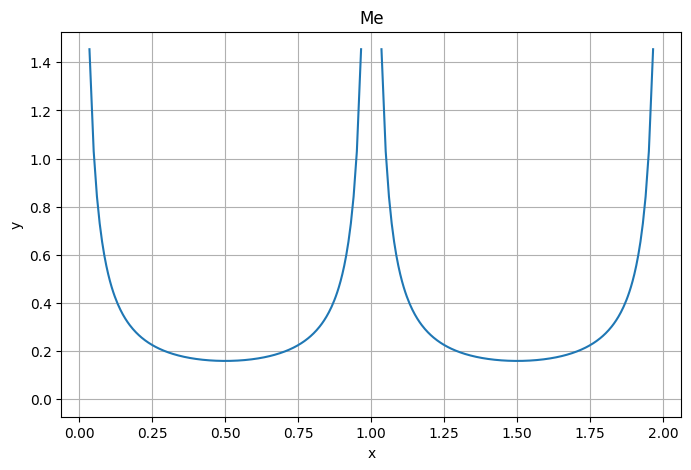

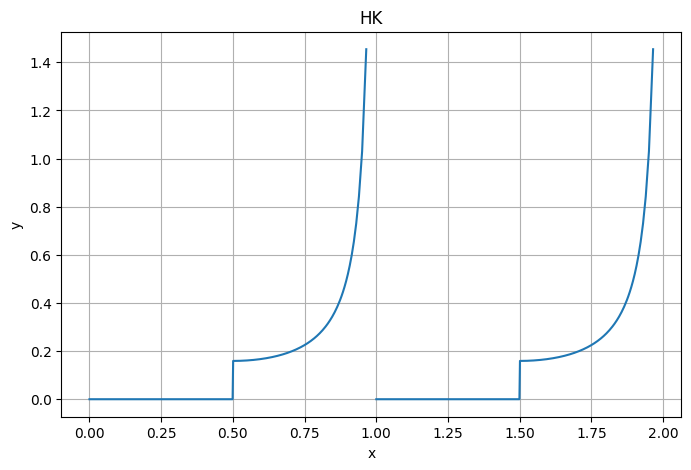

In [167]:
#plot_arrays(ana_me, ana_me, kap_HK, kap_me)
plot_one(ana_me, kap_me, 'Me')
plot_one(ana_me, kap_HK, 'HK')

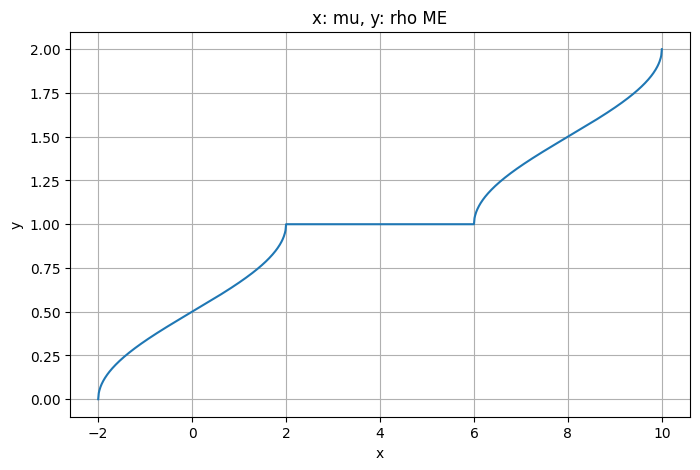

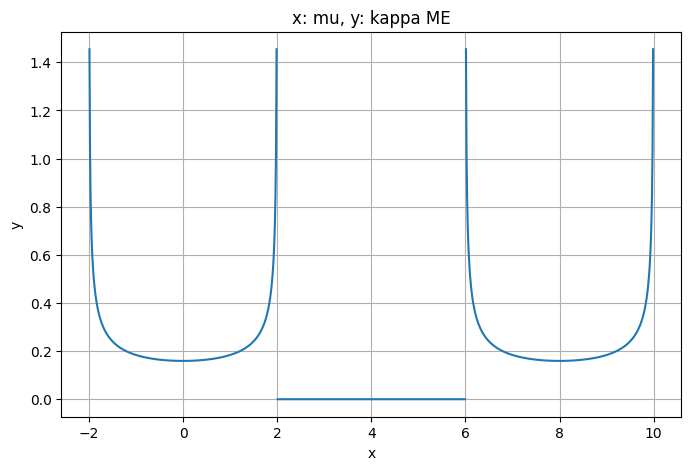

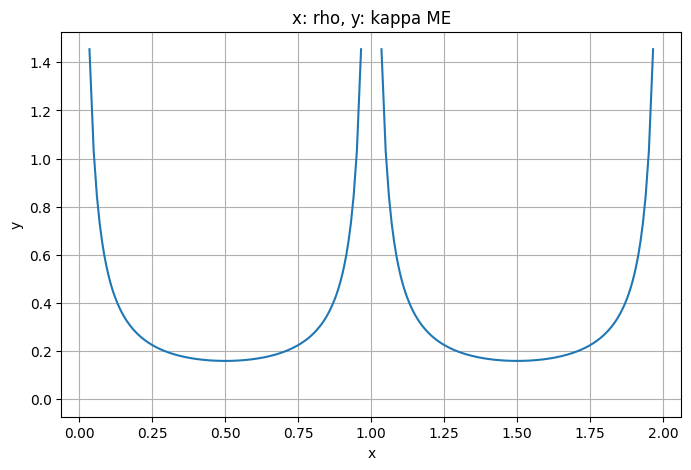

In [168]:
plot_one(mu_array, ana_me, 'x: mu, y: rho ME')
plot_one(mu_array, kap_me, 'x: mu, y: kappa ME')
plot_one(ana_me, kap_me, 'x: rho, y: kappa ME')

In [172]:
def energy(mu, t, U):
    if F((mu - U) / (2 * t)) == 1 and F(mu / (2 * t)) == 1:
        return (U * np.heaviside(mu - U + 2*t, 1) - 
                (1 / np.pi) * (np.sqrt(4 * (t ** 2) - mu**2) 
                               + np.sqrt(4 * (t ** 2) - (mu - U)**2) 
                               + U * np.arccos((mu - U) / (2 * t))))
    elif F((mu - U) / (2 * t)) == 0 and F(mu / (2 * t)) == 1:
        return (U * np.heaviside(mu - U + 2*t, 1) - 
                (1 / np.pi) * (np.sqrt(4 * (t ** 2) - mu**2)))
    elif F((mu - U) / (2 * t)) == 1 and F(mu / (2 * t)) == 0:
        return (U * np.heaviside(mu - U + 2*t, 1) - 
                (1 / np.pi) * (np.sqrt(4 * (t ** 2) - (mu - U)**2) 
                               + U * np.arccos((mu - U) / (2 * t))))
    elif F((mu - U) / (2 * t)) == 0 and F(mu / (2 * t)) == 0:
        return U * np.heaviside(mu - U + 2*t, 1)

In [173]:
energy_ana = np.zeros(1000)

for i in range(1000):
    energy_ana[i] = energy(mu_array[i], t, U)

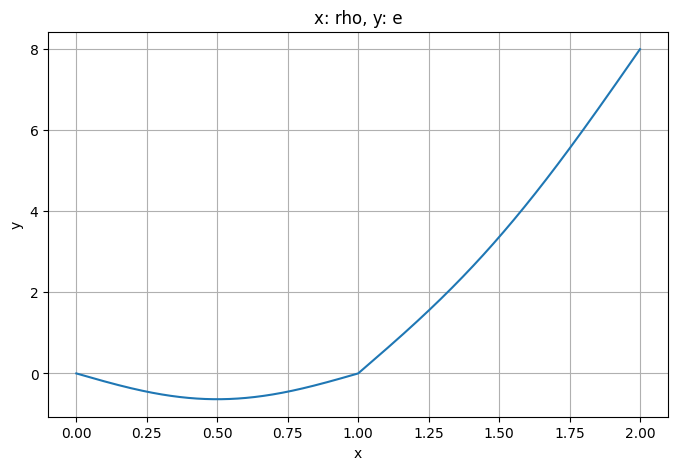

In [174]:
plot_one(ana_me, energy_ana, 'x: rho, y: e')